<a href="https://colab.research.google.com/github/filipematttos/AnaliseDados/blob/main/C%C3%B3pia_de_PROJETO_PR%C3%81TICO_1_Case_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sobre o conjunto de dados:**
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado no valor de  US$ 1bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.
Unucórnios podem também se referir a um fenômeno de recrutamento no setor de recursos humanos(rh). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão com seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.


Unicórnio é uma empresa que atinge o valor de mercado de 1 bilhão de reias(startup),

In [ ]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #para ignoar alguns avisos
warnings.filterwarnings('ignore')

In [ ]:
#Ler os dados

Base_Dados = pd.read_csv('/content/Startups+in+2021+end.csv')

# Verificar Dimensão
Base_Dados.shape


(936, 8)

In [ ]:
#Primeiros registros:
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#Renomeando as colunas:

Base_Dados.rename( columns={

        'Unnamed: 0' : 'Id',
        'Company'  : 'Empresa',
        'Valuation ($B)' : 'Valor',
        'Date Joined' : 'Data de Adesão',
        'Country' :'Pais',
        'City' : 'Cidade',
        'Industry' : 'Industria',
        'Select Investors' : 'Investidores'

},inplace=True) #o parâmetro inplace=True é para aplicar a mudança na base de origem

In [ ]:
#Verificar o tipo da informação

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor           936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Industria       936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#passa quantos campos nulos tem
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor              0
Data de Adesão     0
Pais               0
Cidade            15
Industria          0
Investidores       1
dtype: int64

<Axes: title={'center': 'Analisando Campos Nulos'}>

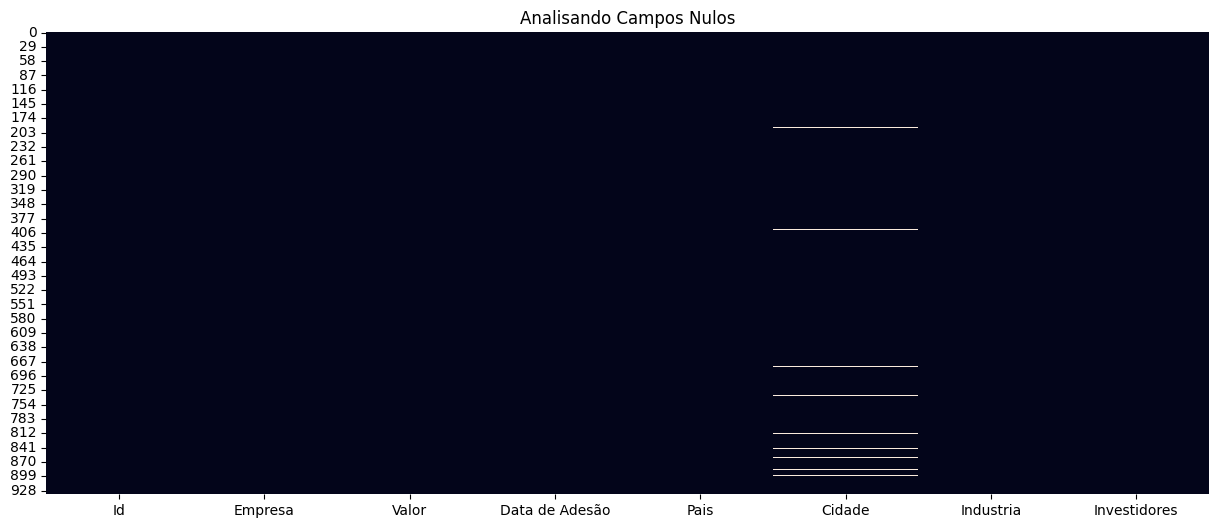

In [ ]:
#Visão gráfica:
plt.figure( figsize=(15,6))#largura de 15, tamanho de 6
plt.title( 'Analisando Campos Nulos') #título do gráfico
sns.heatmap( Base_Dados.isnull(), cbar=False ) #mapa de calor, o Cbar=False é pra tirar a barra de calor
#Interpretação: aonde tem o ponto branco, é aonde tem os campos nulos

In [ ]:
#Campos únicos
Base_Dados.nunique()

Id                936
Empresa           935
Valor             192
Data de Adesão    589
Pais               47
Cidade            239
Industria          17
Investidores      920
dtype: int64

In [ ]:
#Descobrindo todos os valores únicos dentro da coluna 'Cidade'
Base_Dados['Cidade'].unique()

array(['Beijing', 'Hawthorne', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Sao Paulo', 'Cary', nan, 'Bengaluru',
       'Shanghai', 'Jakarta', 'Jacksonville', 'Shenzhen', 'Philadelphia',
       'Waltham', 'San Diego', 'Roseville', 'Munich', 'Luohe',
       'Cheung Sha Wan', 'Walpole', 'New York', 'Boston', 'Glendale',
       'Berlin', 'Kirkland', 'Gurugram', 'Lerma de Villada', 'Reading',
       'Mountain View', 'San Jose', 'San Mateo', 'Chicago', 'Changsha',
       'Mumbai', 'Irving', 'Vancouver', 'Istanbul', 'Santa Clara',
       'Seoul', 'Pittsburgh', 'Palo Alto', 'Hangzhou', 'Amsterdam',
       'Los Angeles', 'Tel Aviv', 'Hoboken', 'Brooklyn', 'Oakland',
       'Fremont', 'Bogota', 'Brussels', 'Atlanta', 'Campinas',
       'Melbourne', 'Irvine', 'Burlingame', 'Zhuhai', 'Vilnius',
       'Seattle', 'Tallinn', 'Eden Prairie', 'Paris', 'Inglewood',
       'Sunnyvale', 'Montreal', 'Vienna', 'Redwood City', 'El Segundo',
       'Mississauga', 'Dublin', 'Columbus', 'Ca

In [ ]:
#Valores únicos na forma de ranking, o values counts vai pegar os valores unicos e contar uqantos registros dele tem na minha base de dados
Base_Dados['Cidade'].value_counts()#colocando o parâmetro normalize=True, consegue ver percentualmente essa divisão


San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
                ... 
Leudelange         1
Goleta             1
Lagos              1
United States      1
Alexandria         1
Name: Cidade, Length: 239, dtype: int64

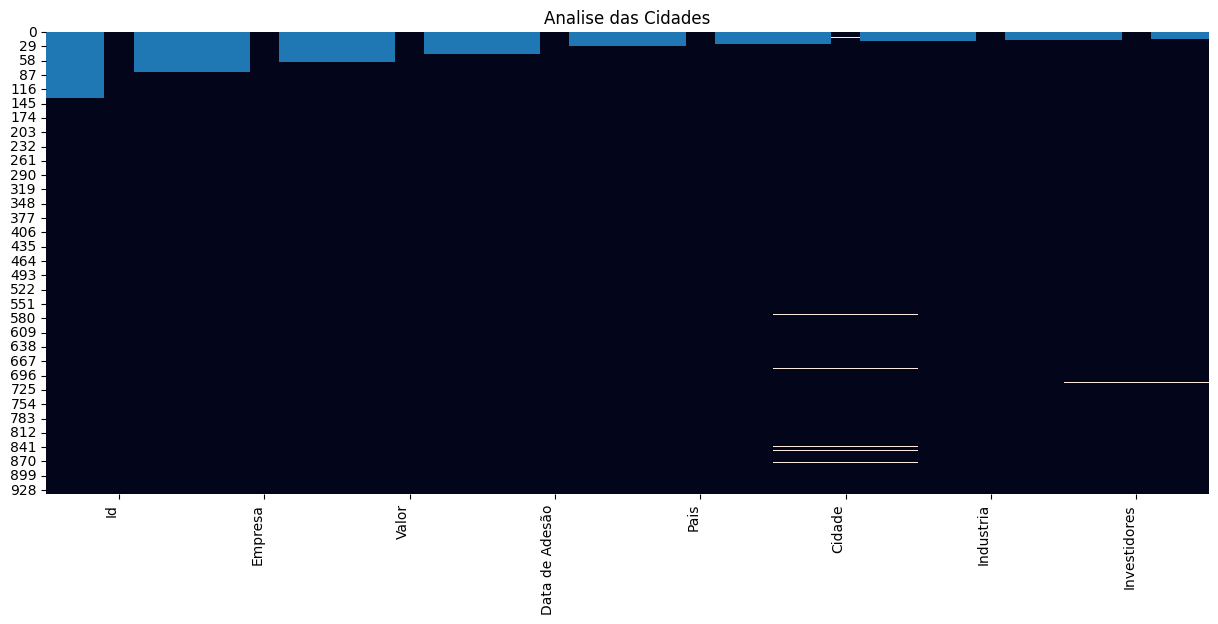

In [ ]:
plt.figure( figsize=(15,6))#largura de 15, tamanho de 6
plt.title( 'Analise das Cidades') #título do gráfico
sns.heatmap( Base_Dados.isnull(), cbar=False )
plt.bar(Base_Dados['Cidade'].value_counts().index, Base_Dados['Cidade'].value_counts())
plt.xticks( rotation=90, ha='right' );

In [ ]:
Base_Dados['Pais'].value_counts()#quantas startups tem em cada país

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [ ]:
Analise = round( Base_Dados['Pais'].value_counts(normalize=True) * 100,1 )#mostrabdo percentualmente

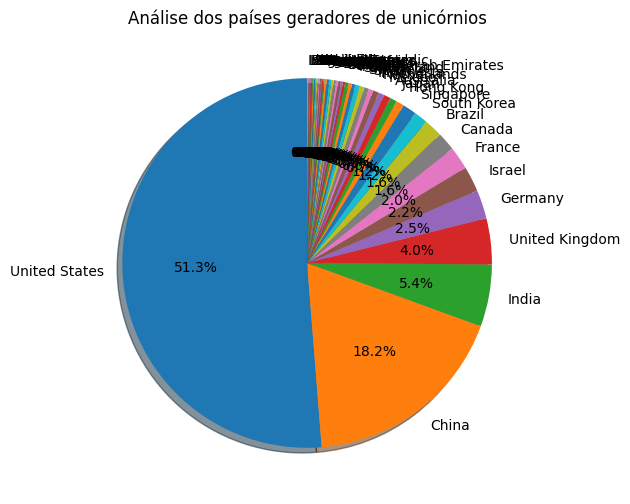

In [ ]:
#Plot geral dos países
plt.figure( figsize=(15,6))
plt.title('Análise dos países geradores de unicórnios')
plt.pie(#fazer gráfico de pizza
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

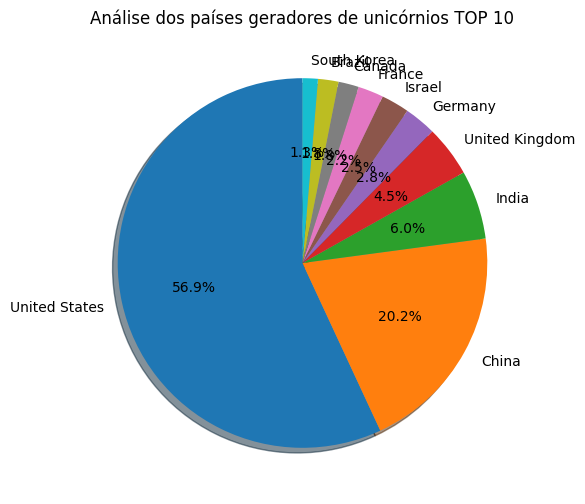

In [ ]:
#Plot geral dos países top 10
plt.figure( figsize=(15,6))
plt.title('Análise dos países geradores de unicórnios TOP 10')
plt.pie(#fazer gráfico de pizza
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#Conversão para data
Base_Dados['Data de Adesão'] = pd.to_datetime( Base_Dados['Data de Adesão'])

Base_Dados['Data de Adesão'].head()



0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [ ]:
# Extrair o mês e ano, cria duas colunas ocm mês e ano
Base_Dados['Mês'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).year

In [ ]:
Base_Dados.head()

,Id,Empresa,Valor($),Data de Adesão,Pais,Cidade,Industria,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela Analítica
#groupby: fazer um agrupamento através do País, Ano e Mês
Analise_Agrupada = Base_Dados.groupby( by =['Pais', 'Ano', 'Mês','Empresa']).count()['Id'].reset_index() #count: encontra a quantidade de ocorrências de um único elemento, seleciona apaenas a coluna ID
Analise_Agrupada

,Pais,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
#loc: vai localizar alguma coisa espcifíca na base de dados
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
#encontrar apenas Argentina  na tabela:
Analise_Agrupada[
    Analise_Agrupada['Pais'] == 'Argentina'
]

,Pais,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1


In [ ]:
#apply: consigo mexer na minha coluna, e percorrer linha por linha
#Susbstituição do valor $ por nada
pd.to_numeric( Base_Dados['Valor'].apply( lambda Linha: Linha.replace('$','')))
#pd.to_numeric: tarsnformar em um valor inteiro
Base_Dados.head()



,Id,Empresa,Valor,Data de Adesão,Pais,Cidade,Industria,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela Analítica
Analise_Pais = Base_Dados.groupby( by=['Pais'] )
Analise_Pais.head()

,Id,Empresa,Valor,Data de Adesão,Pais,Cidade,Industria,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...,...
878,878,Gelato,$1,2021-08-16,Norway,Oslo,E-commerce & direct-to-consumer,"Greylock Partners, Google Ventures, BlackRock",8,2021
891,891,Xendit,$1,2021-09-14,Indonesia,Jakarta,Fintech,"Accel, Y Combinator, Amasia",9,2021
899,899,TrialSpark,$1,2021-09-30,"United States,",New York,Health,"Sequoia Capital, Thrive Capital, Sound Ventures",9,2021
900,900,Ajaib,$1,2021-10-04,"Indonesia,",Jakarta,Fintech,"Softbank Ventures Asia, Alpha JWC Ventures, In...",10,2021
